In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from itertools import product
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset from the CSV file
df = pd.read_csv("dataset.csv")

In [3]:
# Show how many row and column we have
df.shape

(6607, 20)

In [4]:
# Show first 10 data object
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [5]:
# More info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [6]:
# Type conversion of values that appear numeric but are actually categorical

threshold = 10

for column in df.select_dtypes(include=['int64']).columns:
    if df[column].nunique() <= threshold:
        df[column] = df[column].astype('object')

In [7]:
# Type conversion of values that appear categorical but are actually numerical
for column in df.select_dtypes(include=['object']).columns:
    if df[column].nunique() > threshold:
        df[column] = df[column].astype('int64')

In [8]:
# Check if type conversion is successfull
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   object
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   object
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [9]:
# Get descriptive statistics for numerical columns
df.describe()

,Hours_Studied,Attendance,Previous_Scores,Exam_Score
count,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,75.070531,67.235659
std,5.990594,11.547475,14.399784,3.890456
min,1.000000,60.000000,50.000000,55.000000
25%,16.000000,70.000000,63.000000,65.000000
50%,20.000000,80.000000,75.000000,67.000000
75%,24.000000,90.000000,88.000000,69.000000
max,44.000000,100.000000,100.000000,101.000000


# When we examine the minimum and maximum values, we see that the maximum value in the exam score is 101. Here we need to correct incorrect scores over 100.

In [10]:
# Check how many incorrect exam score values
df[df['Exam_Score'] > 100].shape[0]

1

In [11]:
# There is only one wrong exam score. We can remove that line from the data frame
df = df[df['Exam_Score'] <= 100]

In [12]:
# Check descriptive statistics for numerical columns again
df.describe()

,Hours_Studied,Attendance,Previous_Scores,Exam_Score
count,6606.000000,6606.000000,6606.000000,6606.000000
mean,19.974266,79.974720,75.067817,67.230548
std,5.990424,11.546219,14.399184,3.868502
min,1.000000,60.000000,50.000000,55.000000
25%,16.000000,70.000000,63.000000,65.000000
50%,20.000000,80.000000,75.000000,67.000000
75%,24.000000,90.000000,88.000000,69.000000
max,44.000000,100.000000,100.000000,100.000000


Outlier values in the exam score was deleted successfully.

In [14]:
# Get descriptive statistics for categorical columns
df.describe(include='object')

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6606,6606,6606,6606,6606,6606,6606,6606,6528,6606,6606,6606,6606,6516,6539,6606
unique,3,3,2,7,3,2,9,3,3,2,3,7,2,3,3,2
top,Medium,Medium,Yes,7,Medium,Yes,1,Low,Medium,Public,Positive,3,No,High School,Near,Male
freq,3362,3318,3937,1741,3351,6108,2179,2672,3925,4597,2637,2544,5911,3222,3884,3814


In [15]:
# Count unique values in each column
df.nunique()

Hours_Studied                 41
Attendance                    41
Parental_Involvement           3
Access_to_Resources            3
Extracurricular_Activities     2
Sleep_Hours                    7
Previous_Scores               51
Motivation_Level               3
Internet_Access                2
Tutoring_Sessions              9
Family_Income                  3
Teacher_Quality                3
School_Type                    2
Peer_Influence                 3
Physical_Activity              7
Learning_Disabilities          2
Parental_Education_Level       3
Distance_from_Home             3
Gender                         2
Exam_Score                    44
dtype: int64

In [16]:
# Check for duplicated data object
df.duplicated().sum()

0

There is no duplicated data object so we dont need to take any action

In [17]:
# Check for null values
df.isnull().sum().to_frame().T

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0,0,0,0,0,0,0,0,0,0,0,78,0,0,0,0,90,67,0,0


Teacher Quality, Parental_Education_Level and Distance_from_Home
have some null values. We can fill them.

In [18]:
# We should assign categorical and numerical columns to choose which filling method suitable for missing values
cat_cols = [col for col in df.columns if df[col].dtypes == "object"]
num_cols = [col for col in df.columns if col not in cat_cols]
print("Categorical Columns : ")
print(cat_cols)

Categorical Columns : 
['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


All columns have missing values are categorical so we can fill the missing values with mode values.

In [19]:
# Fill the missing values
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0], inplace=True)

In [20]:
# Check again if there is null values or not
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

Values in the colum containing null values were filled with mode values

In [21]:
# Check if categorical values ​​are entered properly
unique_values = df[cat_cols].apply(lambda x: x.unique())
print(unique_values)

Parental_Involvement                           [Low, Medium, High]
Access_to_Resources                            [High, Medium, Low]
Extracurricular_Activities                               [No, Yes]
Sleep_Hours                                 [7, 8, 6, 10, 9, 5, 4]
Motivation_Level                               [Low, Medium, High]
Internet_Access                                          [Yes, No]
Tutoring_Sessions                      [0, 2, 1, 3, 4, 5, 6, 7, 8]
Family_Income                                  [Low, Medium, High]
Teacher_Quality                                [Medium, High, Low]
School_Type                                      [Public, Private]
Peer_Influence                       [Positive, Negative, Neutral]
Physical_Activity                            [3, 4, 2, 1, 5, 0, 6]
Learning_Disabilities                                    [No, Yes]
Parental_Education_Level      [High School, College, Postgraduate]
Distance_from_Home                           [Near, Moderate, 

All categorical values ​​are entered properly into the data set then we can continue data exploration

# VISUALIZATION



Detailed distribution of target variable (Exam_score) :

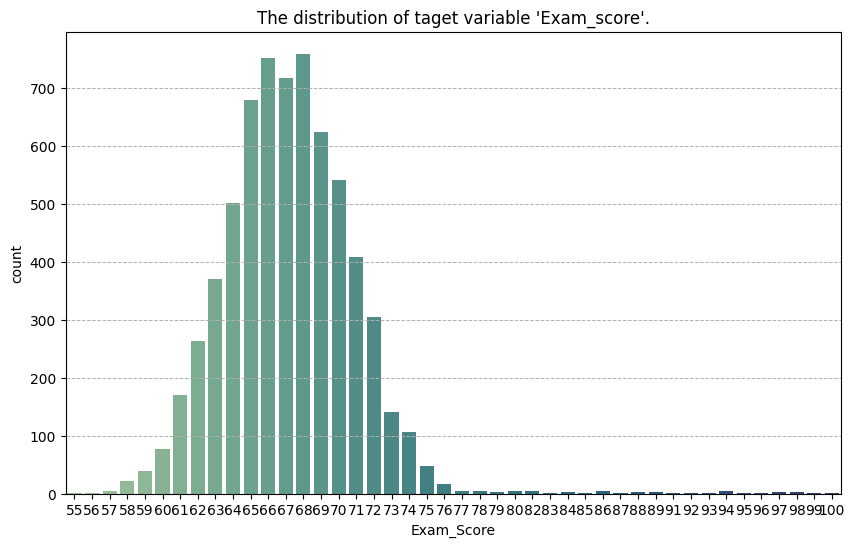

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df["Exam_Score"], palette='crest') # Create countplot
# Note : Count plot is normally used to show categorical values, but I preferred to use it for this feature
# because I wanted to see each score in detail.
plt.title("The distribution of taget variable 'Exam_score'.") # Set plot title
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)

Distribution of categorical features :



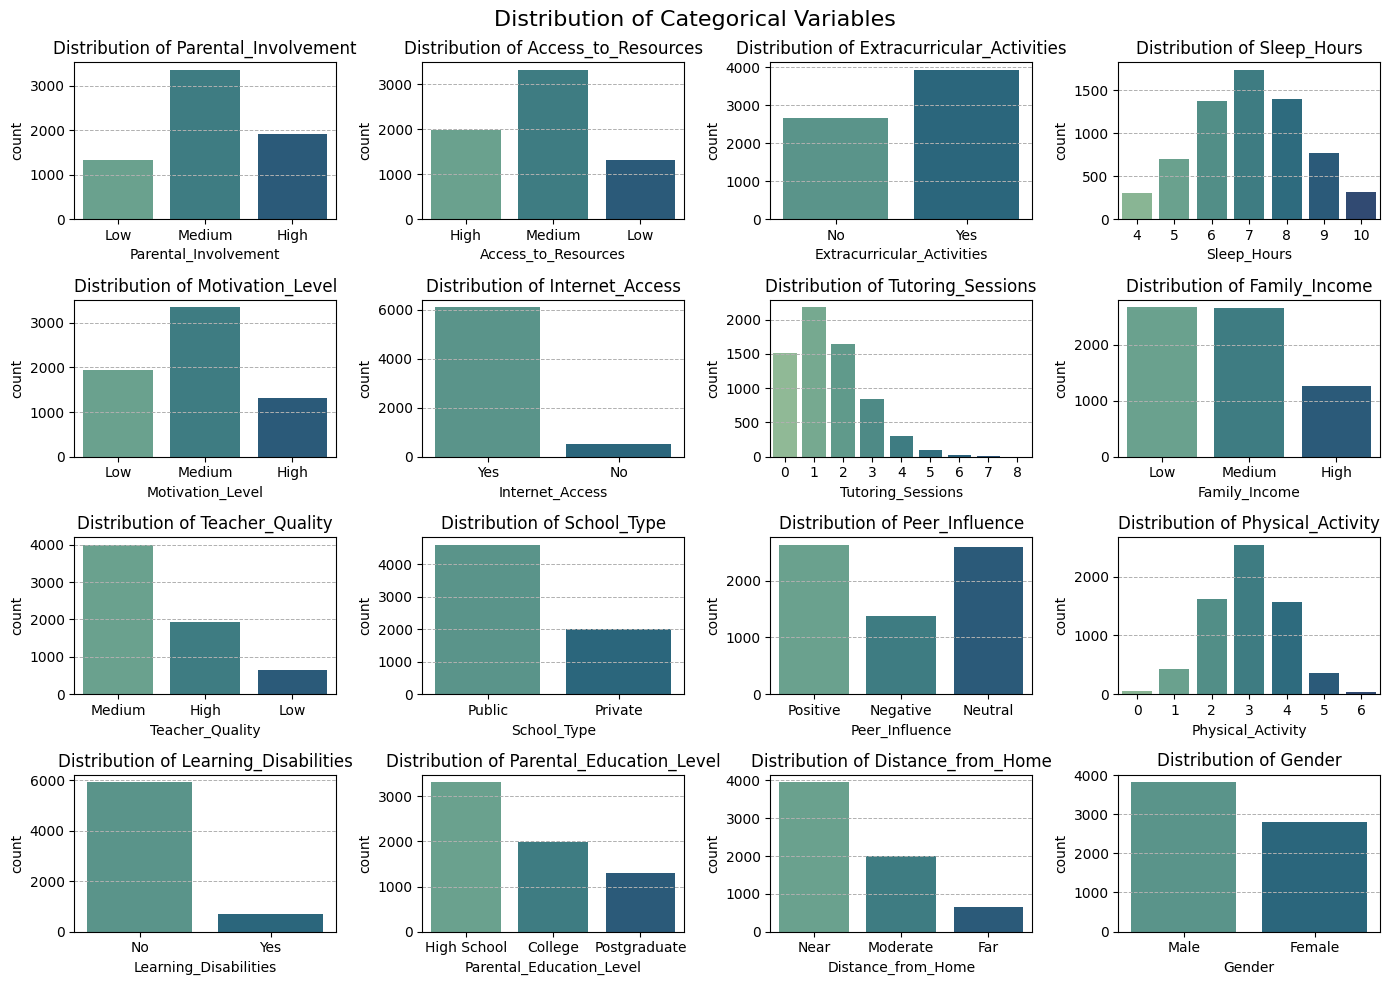

In [23]:
# Create a 4x4 grid of countplots for categorical variable distributions
fig, axes = plt.subplots(4, 4, figsize=(14, 10))
fig.suptitle("Distribution of Categorical Variables", fontsize=16)
axes = axes.ravel() # Flatten the 2D array of axes to 1D for easier indexing

# Plot countplot for each categorical column
for i, col in enumerate(cat_cols):
    sns.countplot(x=df[col], palette='crest', ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)  # Add grid on y-axis

plt.tight_layout()  # Adjust layout
plt.show()  # Display the plots

Histogram of numerical features :

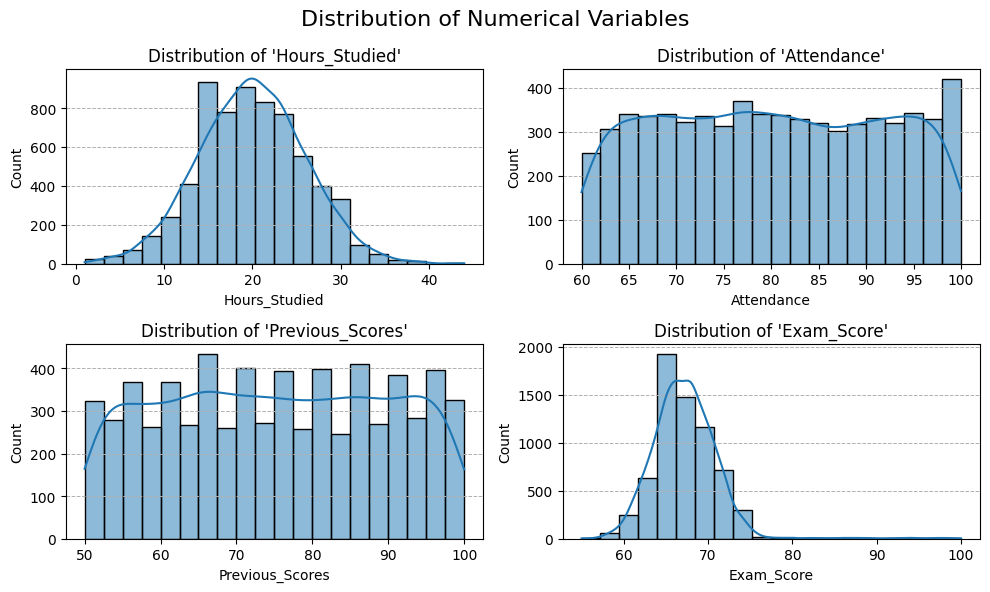

In [24]:
fig , axes = plt.subplots(2,2,figsize=(10,6))
fig.suptitle("Distribution of Numerical Variables",fontsize=16)
axes = axes.ravel()
for i,col in enumerate(num_cols):
  sns.histplot(x=df[col],ax=axes[i],kde=True, bins=20)
  axes[i].set_title(f"Distribution of '{col}'")
  axes[i].grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

Box plot of numerical features :

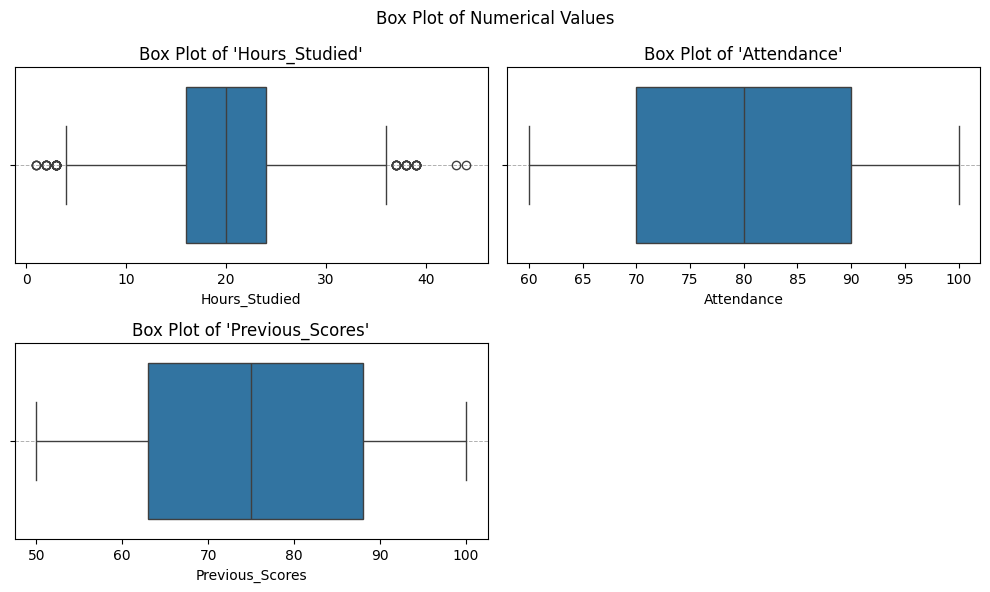

In [25]:
# Create a 2x2 grid for boxplots of numerical columns
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle("Box Plot of Numerical Values")
axes = axes.ravel()

# Plot boxplot for each numerical column, excluding 'Exam_Score'
for i, col in enumerate(num_cols):
    if col == "Exam_Score":
        axes[i].axis('off')
        continue
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Box Plot of '{col}'")
    axes[i].grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

Violin plot is a more advanced version of box plot. In addition to the information shown by the box plot, it also gives us information about the density of the distribution.


Violin Plot of Numerical Values :

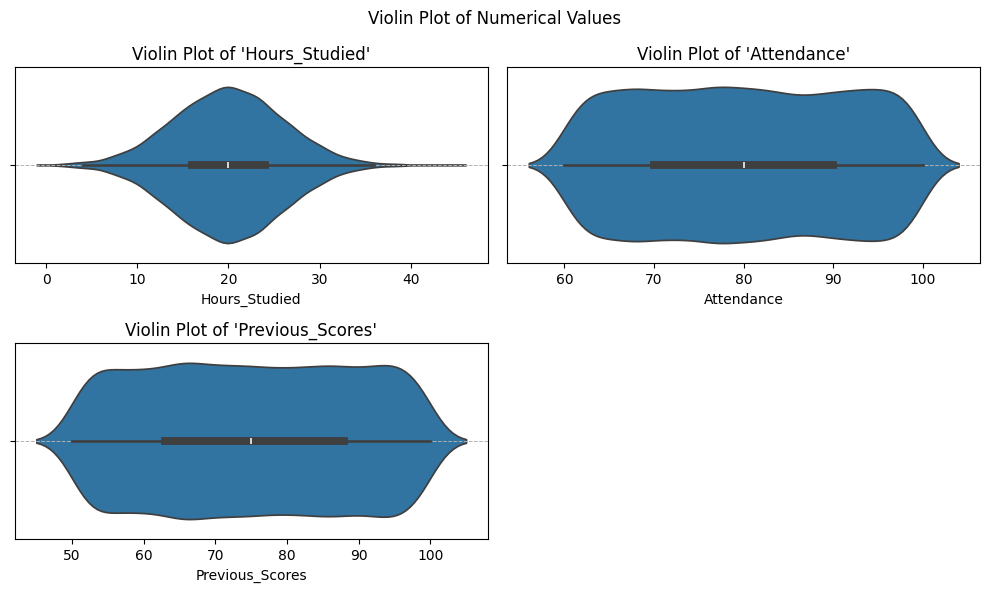

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle("Violin Plot of Numerical Values")
axes = axes.ravel()

for i, col in enumerate(num_cols):
    if col == "Exam_Score":
        axes[i].axis('off')
        continue
    sns.violinplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Violin Plot of '{col}'")
    axes[i].grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


Scatter plot for relationship between exam score and categorical variables :

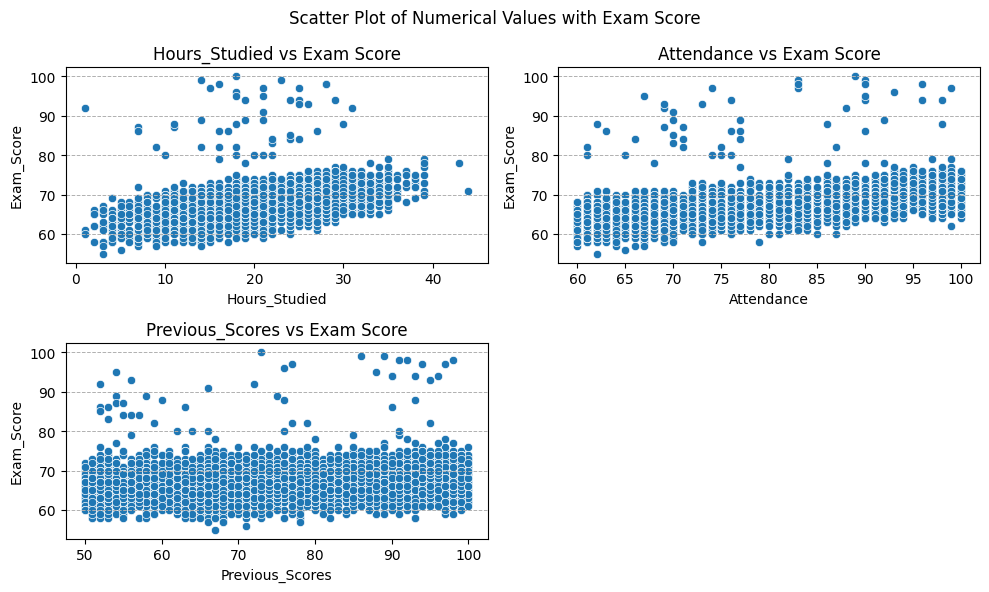

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle("Scatter Plot of Numerical Values with Exam Score")
axes = axes.ravel()
for i, col in enumerate(num_cols):
    if col == "Exam_Score":
        axes[i].axis('off')
        continue
    sns.scatterplot(x=df[col], y=df["Exam_Score"], ax=axes[i])
    axes[i].set_title(f"{col} vs Exam Score")
    axes[i].grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

The charts show that Hours Studied and Attendance have a somewhat direct relationship with exam scores; as hours studied and attendance increase, exam scores tend to rise. On the other hand, Previous Scores do not appear to significantly impact exam performance; some students with high previous scores still receive low exam scores.


Boxplot for relationship between exam score and categorical columns :

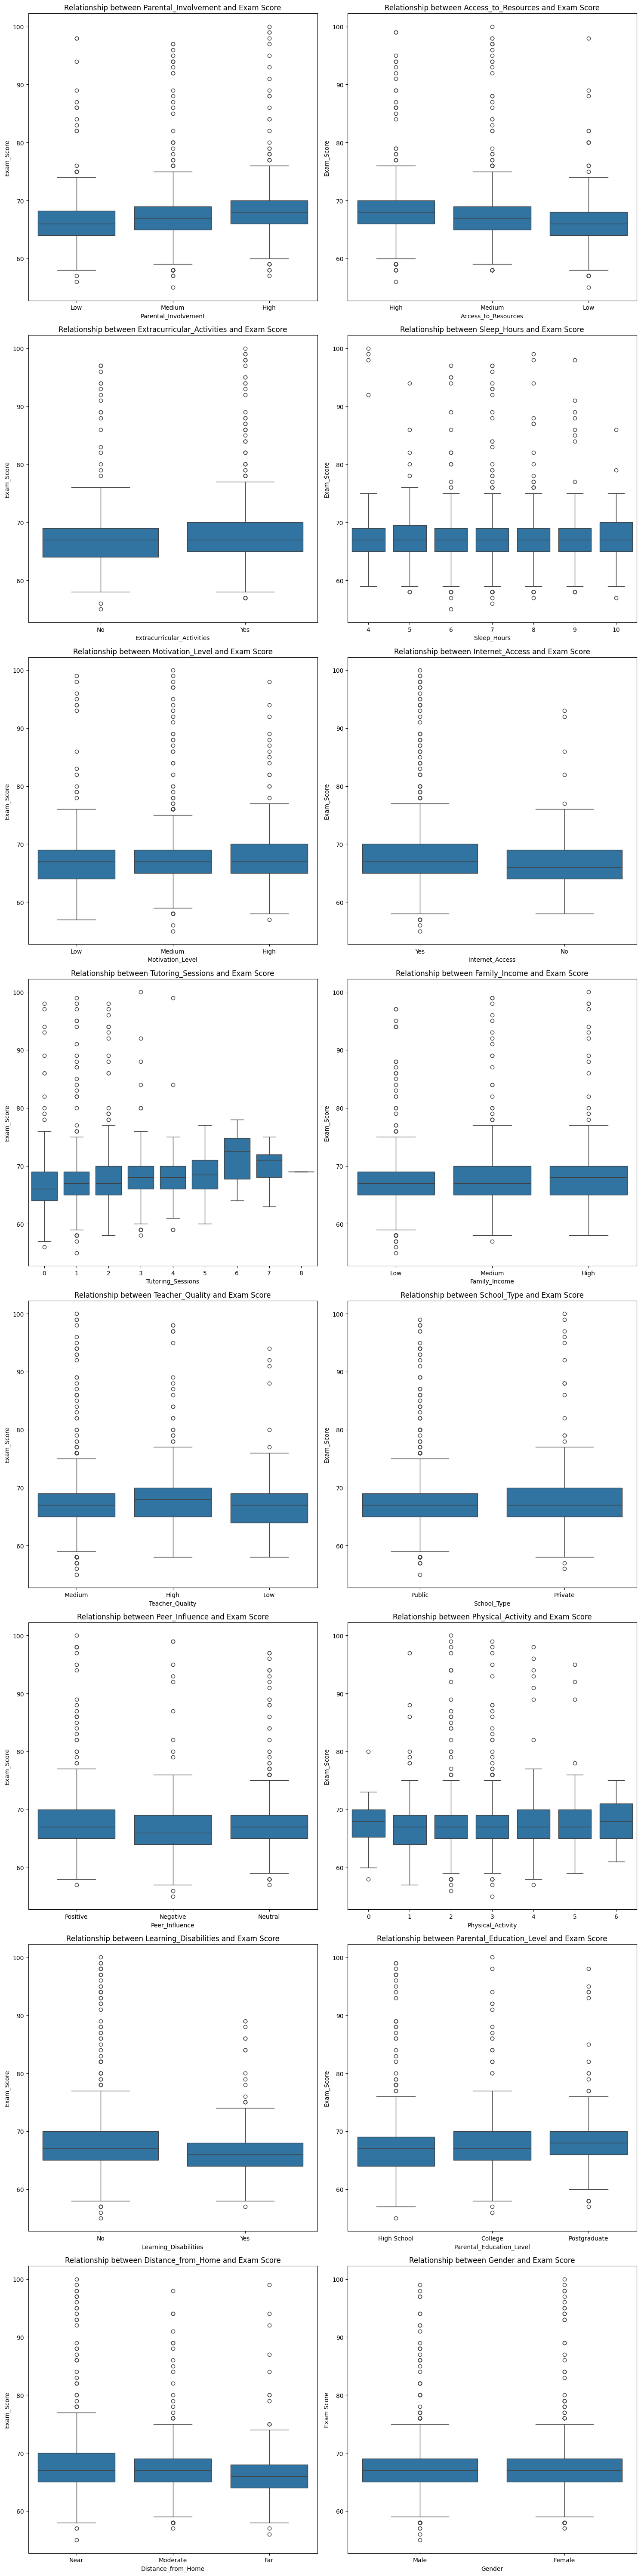

In [28]:
fig, axes = plt.subplots(8, 2, figsize=(15, 60))

axes = axes.ravel()

for i, col in enumerate(cat_cols):
    sns.boxplot(x=df[col], y=df["Exam_Score"], ax=axes[i])
    axes[i].set_title(f'Relationship between {col} and Exam Score')
    plt.xlabel(col)
    plt.ylabel("Exam Score")

plt.tight_layout()
plt.show()


Correlation matrix for Numerical Values :

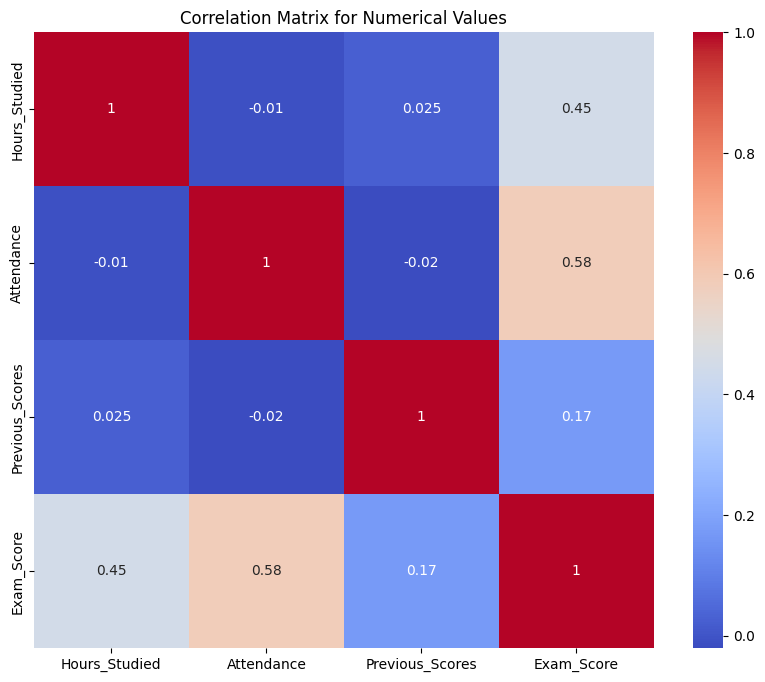

In [30]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = df[num_cols].corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Visualize with annotations
plt.title("Correlation Matrix for Numerical Values")
plt.show()

In order to perform correlation analysis on categorical values, we need to use encoding methods on these values.

The correlation matrix indicates that Attendance has the strongest positive correlation with Exam Score (0.58), suggesting that higher attendance is associated with better exam performance. Hours Studied also shows a moderate positive correlation with Exam Score (0.45), implying that studying more hours may have a positive impact on exam results, though the effect is weaker than attendance. Previous Scores have a low correlation (0.17) with Exam Score, meaning past scores do not strongly influence current exam performance

# Label Encoding

Label encoding is necessary because many machine learning algorithms require numerical input. By converting categorical variables into numerical labels, we make the data compatible with models that cannot handle text directly.


Let's print the unique_values variable again to remember the categorical values and their values :

In [32]:
print(unique_values)

Parental_Involvement                           [Low, Medium, High]
Access_to_Resources                            [High, Medium, Low]
Extracurricular_Activities                               [No, Yes]
Sleep_Hours                                 [7, 8, 6, 10, 9, 5, 4]
Motivation_Level                               [Low, Medium, High]
Internet_Access                                          [Yes, No]
Tutoring_Sessions                      [0, 2, 1, 3, 4, 5, 6, 7, 8]
Family_Income                                  [Low, Medium, High]
Teacher_Quality                                [Medium, High, Low]
School_Type                                      [Public, Private]
Peer_Influence                       [Positive, Negative, Neutral]
Physical_Activity                            [3, 4, 2, 1, 5, 0, 6]
Learning_Disabilities                                    [No, Yes]
Parental_Education_Level      [High School, College, Postgraduate]
Distance_from_Home                           [Near, Moderate, 

Ordinal columns with an inherent order are encoded with predefined mappings,
while nominal categorical columns (without order) are encoded using label encoding.

In [33]:
# Defining ordered categorical mappings for specific columns
ordered_data = {
    'Parental_Involvement': {'Low': 0, 'Medium': 1, 'High': 2},
    'Access_to_Resources': {'Low': 0, 'Medium': 1, 'High': 2},
    'Motivation_Level': {'Low': 0, 'Medium': 1, 'High': 2},
    'Family_Income': {'Low': 0, 'Medium': 1, 'High': 2},
    'Teacher_Quality': {'Low': 0, 'Medium': 1, 'High': 2},
    'Peer_Influence': {'Negative': 0, 'Neutral': 1, 'Positive': 2},
    'Parental_Education_Level': {'High School': 0, 'College': 1, 'Postgraduate': 2},
    'Distance_from_Home': {'Near': 0, 'Moderate': 1, 'Far': 2}
}

# Defining categorical columns for label encoding
label_columns = ['Gender', 'Extracurricular_Activities', "Internet_Access", "School_Type", "Learning_Disabilities"]

label_encoder = LabelEncoder()

# Applying label encoding to categorical columns
for col in label_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Function to apply ordered encoding to specified columns
def encode_dataframe(df, ordered_data):
    for column in df.columns:
        if column in ordered_data:
            encoding = ordered_data[column]
            df[column] = df[column].map(encoding)

encode_dataframe(df, ordered_data)

In [34]:
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,0,7,73,0,1,0,0,1,1,2,3,0,0,0,1,67
1,19,64,0,1,0,8,59,0,1,2,1,1,1,0,4,0,1,1,0,61
2,24,98,1,1,1,7,91,1,1,2,1,1,1,1,4,0,2,0,1,74
3,29,89,0,1,1,8,98,1,1,1,1,1,1,0,4,0,0,1,1,71
4,19,92,1,1,1,6,65,1,1,3,1,2,1,1,4,0,1,0,0,70
5,19,88,1,1,1,8,89,1,1,3,1,1,1,2,3,0,2,0,1,71
6,29,84,1,0,1,7,68,0,1,1,0,1,0,1,2,0,0,1,1,67
7,25,78,0,2,1,6,50,1,1,1,2,2,1,0,2,0,0,2,1,66
8,17,94,1,2,0,6,80,2,1,0,1,0,0,1,1,0,1,0,1,69
9,23,98,1,1,1,8,71,1,1,0,2,2,1,2,5,0,0,1,1,72


# Scaler


In data mining, when features have different value ranges, it can negatively impact the model's learning.

A scaler normalizes (min-max) or standardizes (Z-score) the data to bring feature values to a comparable level, helping the model produce more accurate results.


In [35]:
from sklearn.preprocessing import MinMaxScaler

# Initializing MinMaxScaler
min_max_scaler = MinMaxScaler()

# Applying Min-Max scaling to all features
df[['Hours_Studied', 'Sleep_Hours', 'Physical_Activity', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions']] = min_max_scaler.fit_transform(
    df[['Hours_Studied', 'Sleep_Hours', 'Physical_Activity', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions']]
)


In [36]:
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0.511628,0.600,0,2,0,0.500000,0.46,0,1,0.000,0,1,1,2,0.500000,0,0,0,1,67
1,0.418605,0.100,0,1,0,0.666667,0.18,0,1,0.250,1,1,1,0,0.666667,0,1,1,0,61
2,0.534884,0.950,1,1,1,0.500000,0.82,1,1,0.250,1,1,1,1,0.666667,0,2,0,1,74
3,0.651163,0.725,0,1,1,0.666667,0.96,1,1,0.125,1,1,1,0,0.666667,0,0,1,1,71
4,0.418605,0.800,1,1,1,0.333333,0.30,1,1,0.375,1,2,1,1,0.666667,0,1,0,0,70
5,0.418605,0.700,1,1,1,0.666667,0.78,1,1,0.375,1,1,1,2,0.500000,0,2,0,1,71
6,0.651163,0.600,1,0,1,0.500000,0.36,0,1,0.125,0,1,0,1,0.333333,0,0,1,1,67
7,0.558140,0.450,0,2,1,0.333333,0.00,1,1,0.125,2,2,1,0,0.333333,0,0,2,1,66
8,0.372093,0.850,1,2,0,0.333333,0.60,2,1,0.000,1,0,0,1,0.166667,0,1,0,1,69
9,0.511628,0.950,1,1,1,0.666667,0.42,1,1,0.000,2,2,1,2,0.833333,0,0,1,1,72


All necessary datapreprocessing techniques have been applied on the dataset, now our updated dataset is suitable for use in machine learning models.

# 📊 EXTRA : I found perfect package for data quality profiling and exploratory data analysis . We can get extra insights by checking it out.

In [37]:
# Install specific Numba version, YData Profiling, and upgrade Visions and YData Profiling
!pip install numba==0.53.1
!pip install ydata-profiling
!pip install visions --upgrade
!pip install ydata-profiling --upgrade

ERROR: Ignored the following versions that require a different python version: 0.52.0 Requires-Python >=3.6,<3.9; 0.52.0rc3 Requires-Python >=3.6,<3.9; 0.53.0 Requires-Python >=3.6,<3.10; 0.53.0rc1.post1 Requires-Python >=3.6,<3.10; 0.53.0rc2 Requires-Python >=3.6,<3.10; 0.53.0rc3 Requires-Python >=3.6,<3.10; 0.53.1 Requires-Python >=3.6,<3.10; 0.54.0 Requires-Python >=3.7,<3.10; 0.54.0rc2 Requires-Python >=3.7,<3.10; 0.54.0rc3 Requires-Python >=3.7,<3.10; 0.54.1 Requires-Python >=3.7,<3.10; 0.55.0 Requires-Python >=3.7,<3.11; 0.55.0rc1 Requires-Python >=3.7,<3.11; 0.55.1 Requires-Python >=3.7,<3.11; 0.55.2 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numba==0.53.1 (from versions: 0.1, 0.2, 0.3, 0.5.0, 0.6.0, 0.7.0, 0.7.1, 0.7.2, 0.8.0, 0.8.1, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.12.2, 0.13.0, 0.13.2, 0.13.3, 0.13.4, 0.14.0, 0.15.1, 0.16.0, 0.17.0, 0.18.1, 0.18.2, 0.19.1, 0.19.2, 0.20.0, 0.21.0, 0.22.0, 0.22.1, 0.23.0, 0.23.1, 0

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.0 MB 4.6 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/8.0 MB 4.3 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.0 MB 4.7 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.0 MB 5.0 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.0 MB 4.9 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.0 MB 4.8 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.0 MB 4.9 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 4.8 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.3
    Uninstalling matplotlib-3.10.3:


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\asus vivobook 15\\appdata\\roaming\\python\\python312\\site-packages\\matplotlib\\backends\\_backend_agg.cp312-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:00<00:00, 38.66it/s]


ModuleNotFoundError: No module named 'matplotlib.backends.backend_svg'

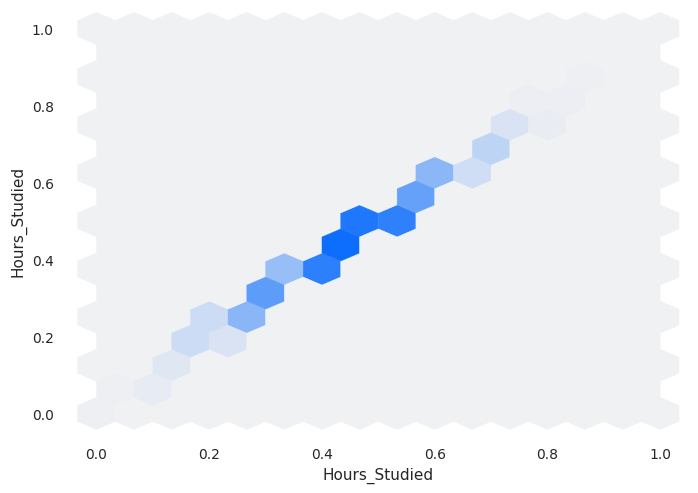

In [42]:
# Generate a detailed data profiling report for the DataFrame (df) and display it in a Jupyter notebook

from ydata_profiling import ProfileReport

profile = ProfileReport(df)
profile.to_notebook_iframe()

**I will drop the attribute “Exam_Score” which is the target value for the model and split the dataframe into X and Y.**

In [43]:
X = df.drop(columns='Exam_Score',axis=1)
Y = df['Exam_Score']

In [44]:
X.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,0.511628,0.600,0,2,0,0.500000,0.46,0,1,0.000,0,1,1,2,0.500000,0,0,0,1
1,0.418605,0.100,0,1,0,0.666667,0.18,0,1,0.250,1,1,1,0,0.666667,0,1,1,0
2,0.534884,0.950,1,1,1,0.500000,0.82,1,1,0.250,1,1,1,1,0.666667,0,2,0,1
3,0.651163,0.725,0,1,1,0.666667,0.96,1,1,0.125,1,1,1,0,0.666667,0,0,1,1
4,0.418605,0.800,1,1,1,0.333333,0.30,1,1,0.375,1,2,1,1,0.666667,0,1,0,0
5,0.418605,0.700,1,1,1,0.666667,0.78,1,1,0.375,1,1,1,2,0.500000,0,2,0,1
6,0.651163,0.600,1,0,1,0.500000,0.36,0,1,0.125,0,1,0,1,0.333333,0,0,1,1
7,0.558140,0.450,0,2,1,0.333333,0.00,1,1,0.125,2,2,1,0,0.333333,0,0,2,1
8,0.372093,0.850,1,2,0,0.333333,0.60,2,1,0.000,1,0,0,1,0.166667,0,1,0,1
9,0.511628,0.950,1,1,1,0.666667,0.42,1,1,0.000,2,2,1,2,0.833333,0,0,1,1


In [45]:
Y.head(10)

0    67
1    61
2    74
3    71
4    70
5    71
6    67
7    66
8    69
9    72
Name: Exam_Score, dtype: int64

In [46]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import (GradientBoostingRegressor)

In [47]:
# Defining a dictionary of used regression models for machine learnin
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso": Lasso(),
    "Support Vector Regression": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
}


In [48]:
# Parameter grid for hyperparameter tuning of different regression models.
param_for_grid = {
    "Linear Regression": {},
    "Lasso": {"alpha": [0.00075, 0.001, 0.010, 0.050]},
    "Ridge Regression": {"alpha": [0.075, 0.085, 0.1, 1.0, 5.0, 10.0]},
    "Gradient Boosting": {
        "n_estimators": [100, 200, 250],
        "learning_rate": [0.01, 0.1, 0.2],
    },
    "Support Vector Regression": {
        "C": [0.1, 1.0, 10.0],
        "epsilon": [0.1, 0.2, 0.5],
    },
}

In [49]:
# Split the dataset into training and testing sets with 80% training data and 20% testing data.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [50]:
def manual_cross_val_score_loss(X, y, model, param_grid, cv, first_call):
    n = len(X)
    fold_size = n // cv

    # Generate parameter combinations
    param_combinations = list(product(*param_grid.values()))
    best_loss = np.inf
    best_params = None

    results = []

    # For each parameter combination
    for params in param_combinations:
        model.set_params(**dict(zip(param_grid.keys(), params)))

        # Cross-validation process
        fold_losses = []
        for fold in range(cv):
            start_idx = fold * fold_size
            end_idx = start_idx + fold_size
            val_indices = list(range(start_idx, end_idx))
            train_indices = list(set(range(n)) - set(val_indices))

            # .iloc to select rows based on indices
            X_train_cv = X.iloc[train_indices]
            y_train_cv = y.iloc[train_indices]
            X_val_cv = X.iloc[val_indices]
            y_val_cv = y.iloc[val_indices]

            # Training the model
            model.fit(X_train_cv, y_train_cv)

            # Predict and calculate loss
            y_pred = model.predict(X_val_cv)
            fold_loss = mean_squared_error(y_val_cv, y_pred)
            fold_losses.append(fold_loss)

        mean_fold_loss = np.mean(fold_losses)
        results.append((params, mean_fold_loss))

        if mean_fold_loss < best_loss:  # Find the lowest loss
            best_loss = mean_fold_loss
            best_params = dict(zip(param_grid.keys(), params))

    results_df = pd.DataFrame(results, columns=["Params", "Loss"])

    # Visualization: Loss for parameter combinations
    model_name = type(model).__name__

    if first_call == True:
        plot_model_performance(model_name, param_grid, results_df, best_loss, best_params)

    return best_loss, best_params

In [51]:
def plot_model_performance(model_name, param_grid, results_df, best_loss, best_params):
    if model_name == "LinearRegression":
        # Text-based visualization for Linear Regression
        plt.figure(figsize=(10, 4))  # Set the figure size
        plt.text(0.5, 0.5, f"Linear Regression doesn't have any hyperparameter", ha='center', va='center', fontsize=12)
        plt.text(0.5, 0.3, f"MSE: {best_loss:.6f}", ha='center', va='center', fontsize=10)
        # Display text without drawing any graph
        plt.axis('off')  # Hide graph axes
        plt.show()

    elif len(param_grid) == 2:  # If there are two parameters
        param_1, param_2 = param_grid.keys()
        results_df[param_1] = [p[0] for p in results_df["Params"]]
        results_df[param_2] = [p[1] for p in results_df["Params"]]
        pivot = results_df.pivot(index=param_1, columns=param_2, values="Loss")

        plt.figure(figsize=(10, 8))
        ax = sns.heatmap(pivot, annot=True, fmt=".3f", cmap="coolwarm", cbar_kws={'label': 'Loss'})
        plt.title(f"{model_name} Hyperparameter Loss Heatmap")
        plt.xlabel(param_2)
        plt.ylabel(param_1)

        # Display best parameters and loss score on the graph
        best_params_text = f"Best Parameters: {best_params}\nBest MSE Score: {best_loss:.3f}"
        plt.text(0.5, -0.2, best_params_text, fontsize=10, color="blue",
                 transform=ax.transAxes, ha="center", va="top", bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

        plt.show()

    else:  # For one-dimensional parameters, plot a line graph
        params_flat = [str(p) for p in results_df["Params"]]
        plt.figure(figsize=(12, 6))
        plt.plot(params_flat, results_df["Loss"], marker='o', linestyle='-', color='b')
        plt.title(f"{model_name} Loss Function Across Hyperparameters")
        plt.xlabel("Hyperparameter Combinations")
        plt.ylabel("Loss (MSE)")
        plt.xticks(rotation=45)
        plt.grid(True)

        # Display best parameters and loss score on the graph
        best_params_text = f"Best Parameter: {best_params}\nBest MSE Score: {best_loss:.6f}"
        plt.text(len(params_flat) * 0.6, min(results_df["Loss"]), best_params_text, fontsize=10, color="red",
                 bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

        plt.tight_layout()
        plt.show()


Linear Regression - Grid Search Başladı 



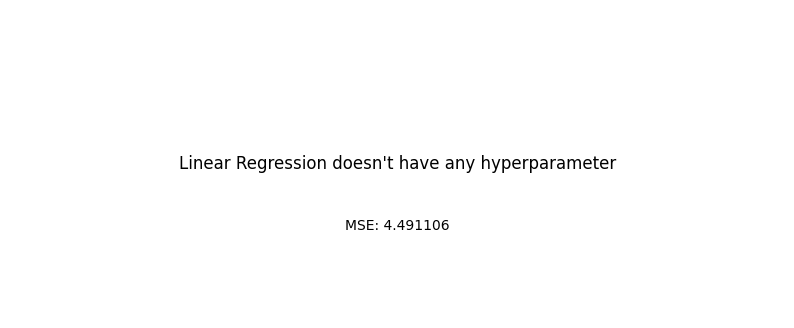




Ridge Regression - Grid Search Başladı 



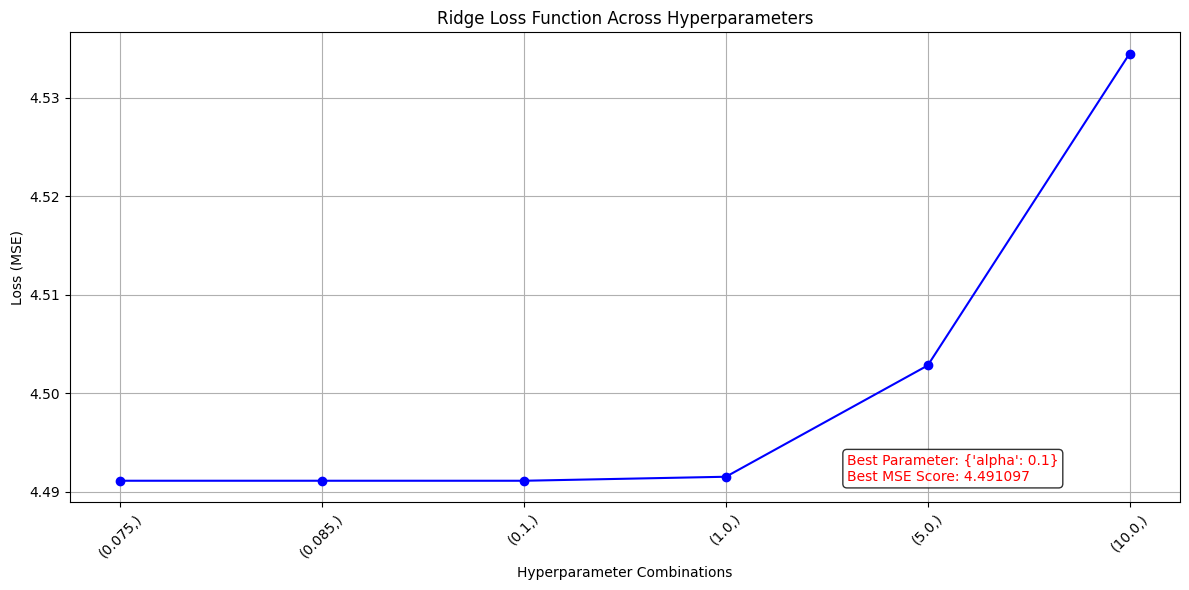




Lasso - Grid Search Başladı 



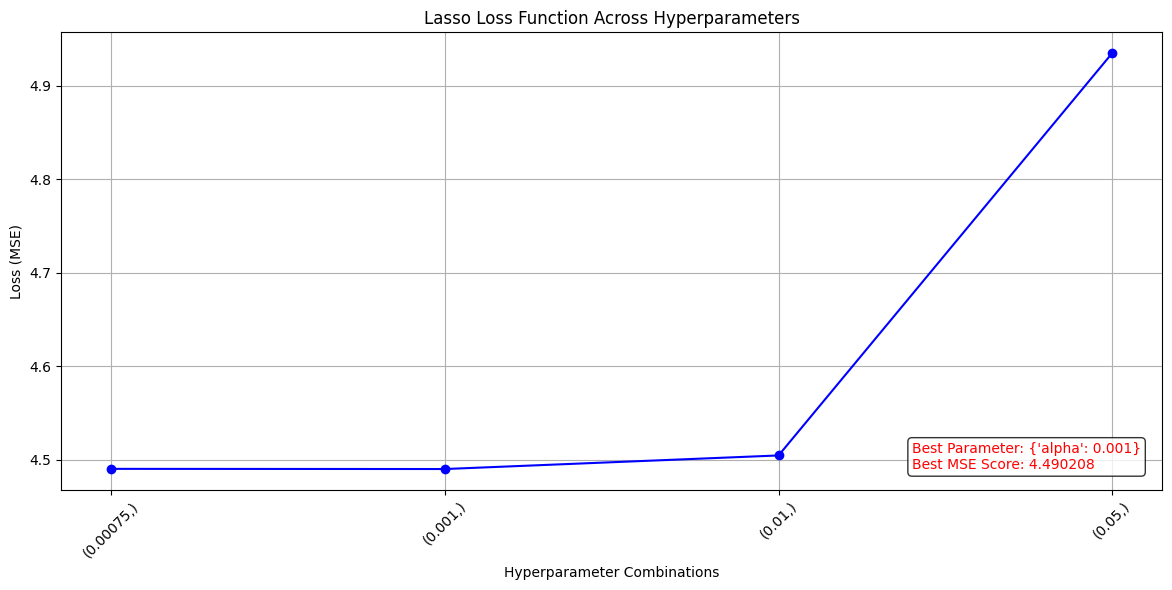




Support Vector Regression - Grid Search Başladı 



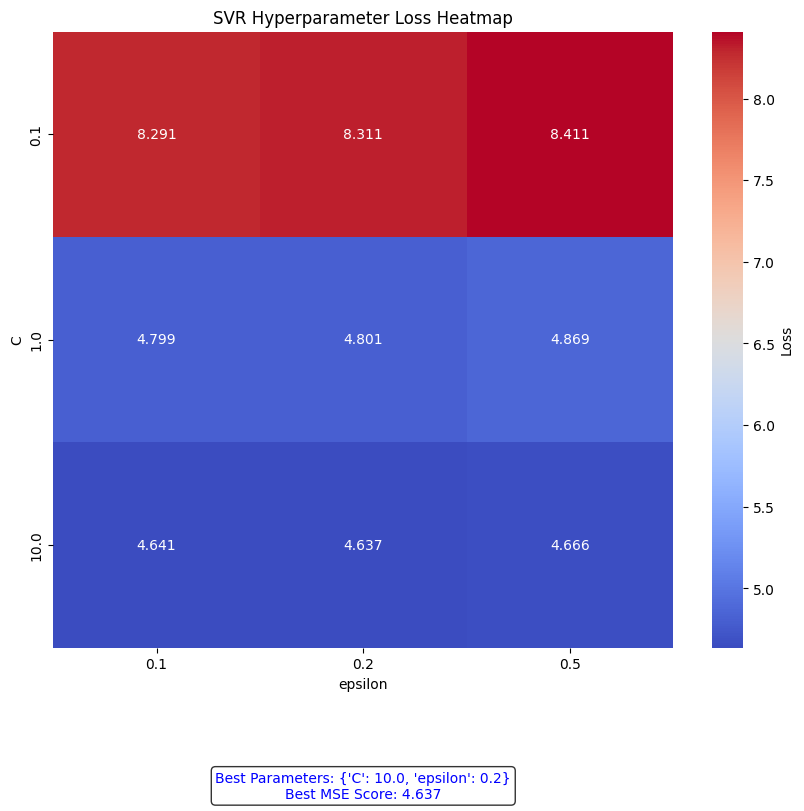




Gradient Boosting - Grid Search Başladı 



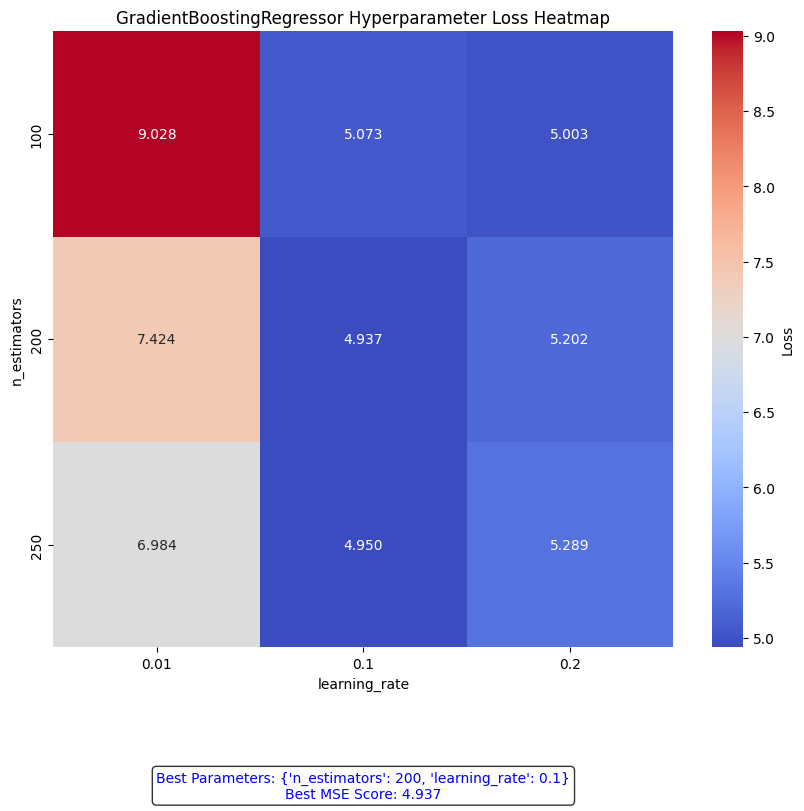

In [52]:
best_params = {}
best_scores = {}

# Grid Search and Cross-Validation
for model_name, model in models.items():
    print(f"\n{model_name} - Grid Search Başladı \n")
    best_model = None
    best_param = None
    best_score = -np.inf

    if model_name in param_for_grid:
        param_grid = param_for_grid[model_name]

        # Optimize the hyperparameters by combining cross validation and grid search.
        cv_score, params = manual_cross_val_score_loss(X_train, y_train, model, param_grid, cv=5,first_call=True)

        best_param = params
        best_score = cv_score

    # Save the best model
    best_params[model_name] = best_param
    best_scores[model_name] = best_score
    print("\n")

In [53]:
optimized_models = {}

for model_name, model in models.items():
    if model_name in best_params:
        # Set best parameters to the model
        model.set_params(**best_params[model_name])
        # Re-train the model with the best parameters
        model.fit(X_train, y_train)
        # Save the updated mdoel
        optimized_models[model_name] = model

for model_name, model in optimized_models.items():
    print(f"{model_name} optimize edilmiş model: {model}")

Linear Regression optimize edilmiş model: LinearRegression()
Ridge Regression optimize edilmiş model: Ridge(alpha=0.1)
Lasso optimize edilmiş model: Lasso(alpha=0.001)
Support Vector Regression optimize edilmiş model: SVR(C=10.0, epsilon=0.2)
Gradient Boosting optimize edilmiş model: GradientBoostingRegressor(n_estimators=200, random_state=42)


In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
r2_scores = {}

for model_name, model in optimized_models.items():
    # Cross-validation process: Evaluation using R2 score
    cv_r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # Save the average R2 score
    r2_scores[model_name] = np.mean(cv_r2_scores)

# Compare the R2 scores
print("R2 Skorları:")
for model_name, r2_score_value in r2_scores.items():
    print(f"{model_name}: {r2_score_value:.4f}")

best_model_name = max(r2_scores, key=r2_scores.get)
print(f"\nEn yüksek R2 skoruna sahip model: {best_model_name} ({r2_scores[best_model_name]:.4f})")

R2 Skorları:
Linear Regression: 0.7171
Ridge Regression: 0.7171
Lasso: 0.7172
Support Vector Regression: 0.7075
Gradient Boosting: 0.6860

En yüksek R2 skoruna sahip model: Lasso (0.7172)


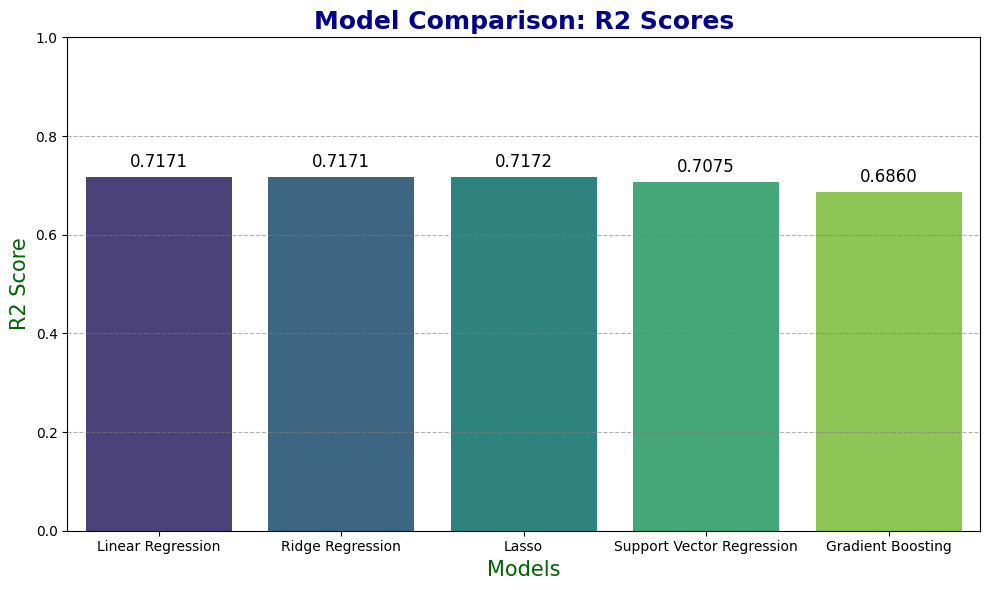

In [56]:
# Separation of R2 scores into model names and scores
model_names = list(r2_scores.keys())
r2_values = list(r2_scores.values())

# Setting of graphic size
plt.figure(figsize=(10, 6))

# Barplot
sns.barplot(x=model_names, y=r2_values, palette='viridis')

# Labels and Titles
plt.title('Model Comparison: R2 Scores', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Models', fontsize=15, color='darkgreen')
plt.ylabel('R2 Score', fontsize=15, color='darkgreen')

# Y axis limits
plt.ylim(0, 1)

# Grid settings
plt.grid(axis='y', linestyle='--', alpha=0.6, color='gray')

# Writing R2 scores on each bar
for i, v in enumerate(r2_values):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center', fontsize=12, color='black')

plt.tight_layout()

plt.show()



Linear Regression modelini değerlendirme...

Linear Regression - Test Seti MSE: 2.3038



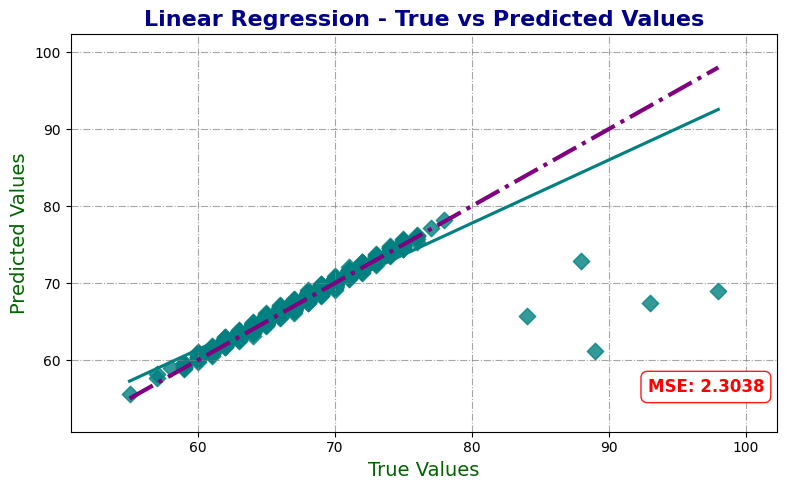



Ridge Regression modelini değerlendirme...

Ridge Regression - Test Seti MSE: 2.3040



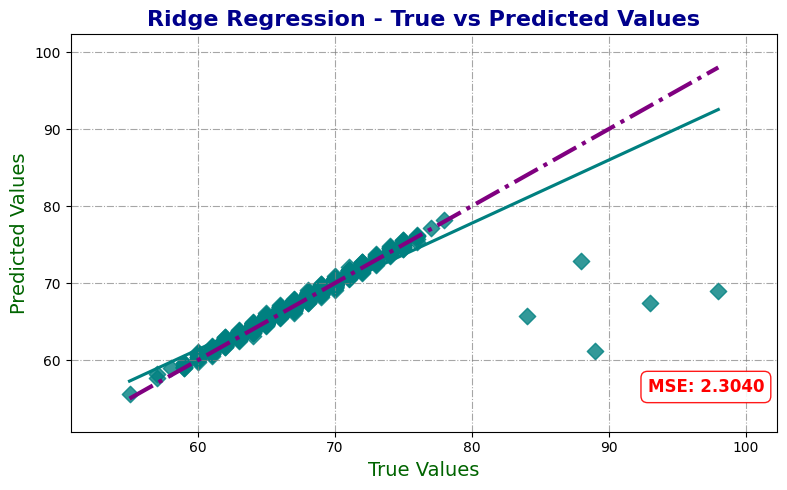



Lasso modelini değerlendirme...

Lasso - Test Seti MSE: 2.3059



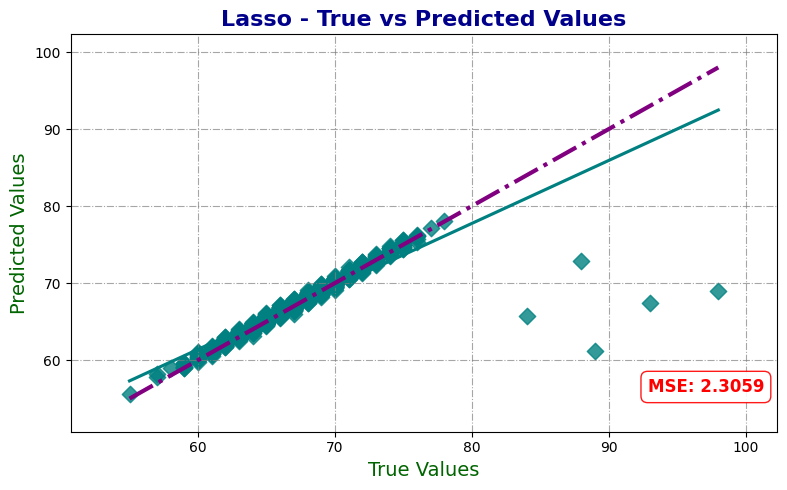



Support Vector Regression modelini değerlendirme...

Support Vector Regression - Test Seti MSE: 2.3969



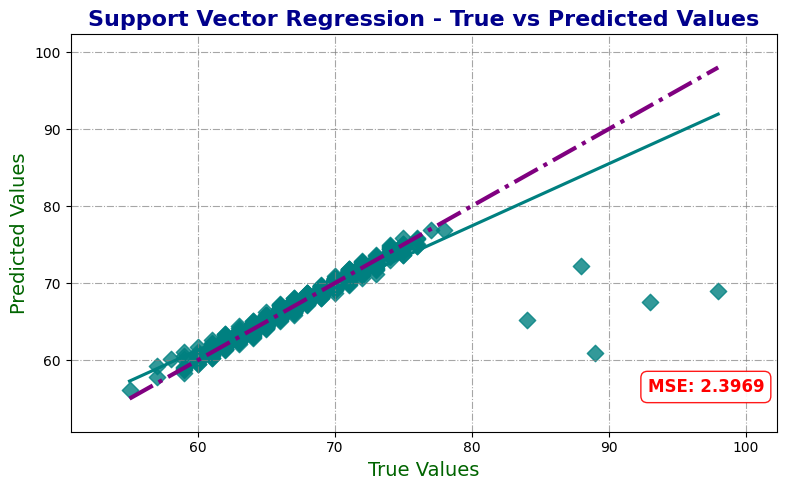



Gradient Boosting modelini değerlendirme...

Gradient Boosting - Test Seti MSE: 2.7664



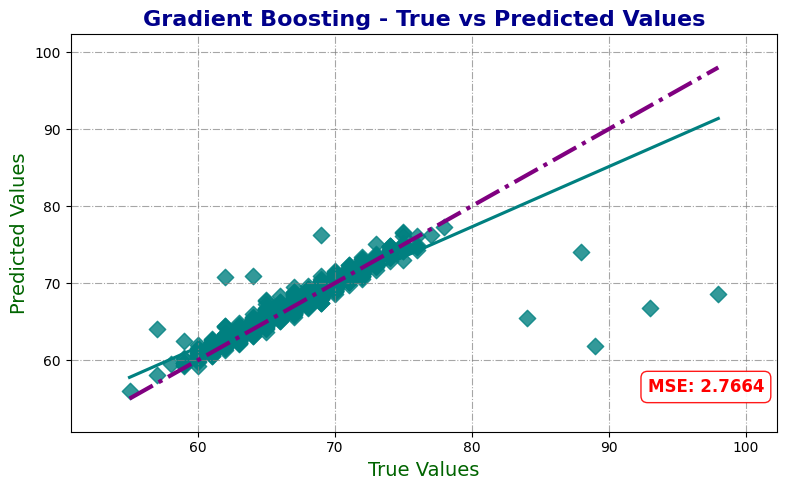

In [57]:
for model_name, model in optimized_models.items():
    print("\n")
    print(f"{model_name} modelini değerlendirme...\n")

    # Making prediction on test set
    y_pred = model.predict(X_test)

    # MSE calculation
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model_name} - Test Seti MSE: {mse:.4f}\n")

    # Plotting the comparison between True vs Predicted values using a scatter plot and regression line
    plt.figure(figsize=(8, 5))
    sns.regplot(x=y_test, y=y_pred, ci=None, color='teal', marker='D', scatter_kws={'s':70, 'alpha':0.8})

    # Plotting reference line for perfect prediction
    max_val = max(max(y_test), max(y_pred))
    min_val = min(min(y_test), min(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], color='purple', linestyle='-.', lw=3)

    # Adjust plot limits to give more space for grid and MSE box
    padding = (max_val - min_val) * 0.1
    plt.xlim(min_val - padding, max_val + padding)
    plt.ylim(min_val - padding, max_val + padding)

    # Setting plot titles and labels
    plt.title(f'{model_name} - True vs Predicted Values', fontsize=16, fontweight='bold', color='darkblue')
    plt.xlabel('True Values', fontsize=14, color='darkgreen')
    plt.ylabel('Predicted Values', fontsize=14, color='darkgreen')

    # Adding grid and adjusting layout
    plt.grid(True, linestyle='-.', alpha=0.7, color='grey')

    # Adding MSE text to the plot
    plt.text(
        max_val - padding * 1.2,
        min_val + padding * 0.2,
        f'MSE: {mse:.4f}',
        fontsize=12,
        color='red',
        fontweight='bold',
        bbox=dict(facecolor='white', alpha=0.9, edgecolor='red', boxstyle='round,pad=0.4')
    )

    # Show plot for this model
    plt.tight_layout()
    plt.show()

In [58]:
acc = []
names = ['Linear Regression', 'Ridge', 'Lasso', 'SVR', 'Gradient Boosting']

# Calculate scores of models
for model_name, model in optimized_models.items():
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculation of R2 score
    score = r2_score(y_test, y_pred)

    acc.append(score)

for name, score in zip(names, acc):
    print(f"{name} - R2 Score: {score:.4f}")

Linear Regression - R2 Score: 0.8258
Ridge - R2 Score: 0.8258
Lasso - R2 Score: 0.8256
SVR - R2 Score: 0.8187
Gradient Boosting - R2 Score: 0.7908


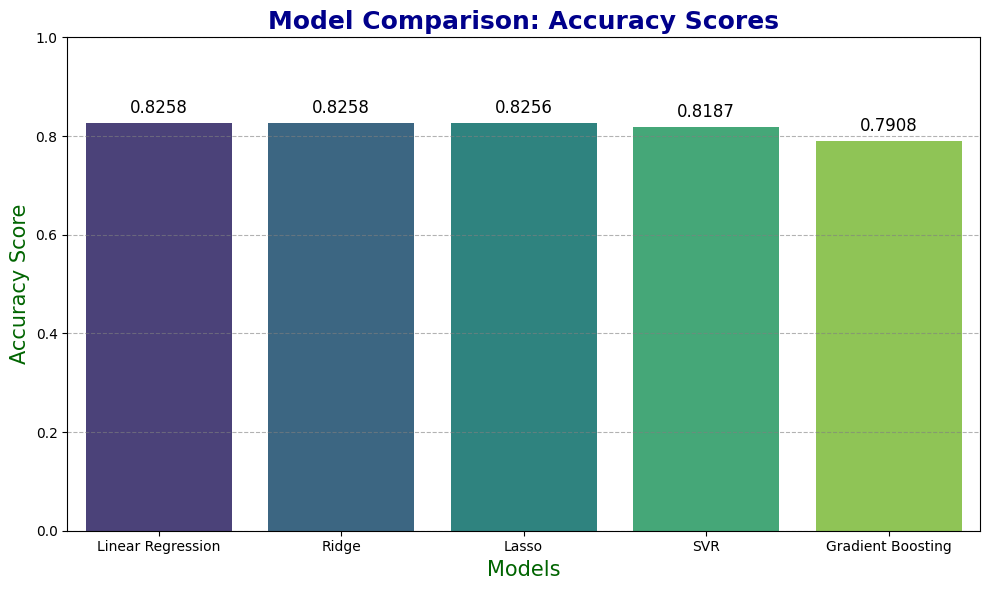

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the accuracy scores of the models
plt.figure(figsize=(10, 6))

sns.barplot(x=names, y=acc, palette='viridis')

plt.title('Model Comparison: Accuracy Scores', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Models', fontsize=15, color='darkgreen')
plt.ylabel('Accuracy Score', fontsize=15, color='darkgreen')

# Y axis limits
plt.ylim(0, 1)

# Grid settings
plt.grid(axis='y', linestyle='--', alpha=0.6, color='gray')

# Writing R2 scores on each bar
for i, v in enumerate(acc):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center', fontsize=12, color='black')

plt.tight_layout()

plt.show()

In [60]:
best_model = Lasso(alpha=0.001)
best_model.fit(X_train, y_train)
y_pred=best_model.predict(X_test)

# Calculating and printing the mean squared error (MSE) and R² scores for training and test sets
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("mean absolute error: ",mean_absolute_error(y_test, y_pred))
print("r2_score: ",r2_score(y_test, y_pred))


mean_squared_error:  2.3058548979160265
mean absolute error:  0.41176877658244754
r2_score:  0.8256339452783479


In [62]:
import pickle

In [63]:
# Define the filename for saving the model
filename = 'student_performance_model.sav'

# Save the trained model using pickle
pickle.dump(best_model, open(filename, 'wb'))

In [64]:
# loading the saved model
loaded_model = pickle.load(open('student_performance_model.sav', 'rb'))

# DEPLOYMENT OF MODEL TO ONLINE

In [65]:
!pip install streamlit

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.6 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.6 MB 409.0 kB/s eta 0:00:05
   -------- ------------------------------- 0.5/2.6 MB 409.0 kB/s eta 0:00:05
   -------- ------------------------------- 0.5/2.6 MB 409.0 kB/s eta 0:00:05
   ------------ --------------------------- 0.8/2.6 MB 409.0 kB/s eta 0:00:05
   ---------------- ----------------------- 1.0/2.6 MB 513.3 kB/s eta 0:00:03
   ---------------- ----------------------- 1.0/2.6 MB 513.3 kB/s eta 0:00:03
   ---------------- ----------------------- 1.0/2.6 MB 513.3 kB/s eta 0:00:03
   -------------------- ------------------- 1.3/2.6 MB 486.1 kB/s eta 0:00:03
   -------------------- ------------------- 1.3/2.6 MB 486.1 kB/s eta 0:00:03
   -------------------

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.16.1 requires matplotlib<=3.10,>=3.5, but you have matplotlib 3.10.3 which is incompatible.


In [66]:
pip install streamlit_option_menu

   ---------------------------------------- 0.0/829.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/829.3 kB ? eta -:--:--
   ------------ --------------------------- 262.1/829.3 kB ? eta -:--:--
   ------------------------ ------------- 524.3/829.3 kB 989.2 kB/s eta 0:00:01
   ---------------------------------------- 829.3/829.3 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/10.1 MB 799.2 kB/s eta 0:00:12
   --- ------------------------------------ 0.8/10.1 MB 1.3 MB/s eta 0:00:08
   ------ --------------------------------- 1.6/10.1 MB 2.0 MB/s eta 0:00:05
   --------- ------------------------------ 2.4/10.1 MB 2.4 MB/s eta 0:00:04
   ----------- ---------------------------- 2.9/10.1 MB 2.2 MB/s eta 0:00:04
   -------------- ------------------------- 3.7/10.1 MB 2.5 MB/s eta 0:00:03
   ----------------- 

In [67]:
app_code = """
import pickle
import streamlit as st
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Set page configuration
st.set_page_config(page_title="Student Performance Predictor", layout="wide", page_icon="📊")

# Load the saved model
import os
working_dir = os.path.dirname(os.path.abspath(__file__))
performance_model = pickle.load(open(f"{working_dir}/student_performance_model.sav", 'rb'))

# Title and description
st.title("🎓 Student Performance Predictor")
st.write("Fill in the details below to predict the student's performance score.")

# Create form layout using columns
col1, col2, col3 = st.columns(3)

# Input fields in col1
with col1:
    hours_studied = st.number_input("📖 Hours Studied", min_value=1, max_value=44, step=1)
    attendance = st.slider("🎓 Attendance (%)", min_value=60, max_value=100, step=1)
    parental_involvement = st.selectbox("👨‍👩‍👧 Parental Involvement", ["Low", "Medium", "High"])
    access_to_resources = st.selectbox("📚 Access to Resources", ["Low", "Medium", "High"])
    extracurricular_activities = st.selectbox("🏆 Extracurricular Activities", ["No", "Yes"])
    sleep_hours = st.selectbox("💤 Sleep Hours", [4, 5, 6, 7, 8, 9, 10])

# Input fields in col2
with col2:
    previous_scores = st.slider("📊 Previous Scores (%)", min_value=50, max_value=100, step=1)
    motivation_level = st.selectbox("💪 Motivation Level", ["Low", "Medium", "High"])
    internet_access = st.selectbox("🌐 Internet Access", ["Yes", "No"])
    tutoring_sessions = st.selectbox("📚 Tutoring Sessions", [0, 1, 2, 3, 4, 5, 6, 7, 8])
    family_income = st.selectbox("💰 Family Income", ["Low", "Medium", "High"])
    teacher_quality = st.selectbox("👩‍🏫 Teacher Quality", ["Low", "Medium", "High"])

# Input fields in col3
with col3:
    school_type = st.selectbox("🏫 School Type", ["Public", "Private"])
    peer_influence = st.selectbox("👫 Peer Influence", ["Negative", "Neutral", "Positive"])
    physical_activity = st.selectbox("🏃 Physical Activity (Hours)", [0, 1, 2, 3, 4, 5, 6])
    learning_disabilities = st.selectbox("🧠 Learning Disabilities", ["No", "Yes"])
    parental_education = st.selectbox("🎓 Parental Education Level", ["High School", "College", "Postgraduate"])
    distance_from_home = st.selectbox("🏠 Distance from Home", ["Near", "Moderate", "Far"])
    gender = st.selectbox("👤 Gender", ["Male", "Female"])

# Data preprocessing
data = pd.DataFrame({
    'Hours_Studied': [hours_studied],
    'Attendance': [attendance],
    'Parental_Involvement': [parental_involvement],
    'Access_to_Resources': [access_to_resources],
    'Extracurricular_Activities': [extracurricular_activities],
    'Sleep_Hours': [sleep_hours],
    'Previous_Scores': [previous_scores],
    'Motivation_Level': [motivation_level],
    'Internet_Access': [internet_access],
    'Tutoring_Sessions': [tutoring_sessions],
    'Family_Income': [family_income],
    'Teacher_Quality': [teacher_quality],
    'School_Type': [school_type],
    'Peer_Influence': [peer_influence],
    'Physical_Activity': [physical_activity],
    'Learning_Disabilities': [learning_disabilities],
    'Parental_Education_Level': [parental_education],
    'Distance_from_Home': [distance_from_home],
    'Gender': [gender]
})

# Define the correct order of columns
ordered_columns = [
    'Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
    'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions',
    'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity',
    'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender'
]

# Reorder the data columns to match the model's expected order
data = data[ordered_columns]

# Custom scaling function for specific ranges
def custom_scale(value, min_value, max_value):
    return (value - min_value) / (max_value - min_value)

# Apply custom scaling for specific columns
data['Attendance'] = custom_scale(data['Attendance'][0], 60, 100)  # Scale between 60 and 100
data['Hours_Studied'] = custom_scale(data['Hours_Studied'][0], 1, 44)  # Scale between 1 and 44
data['Previous_Scores'] = custom_scale(data['Previous_Scores'][0], 50, 100)  # Scale between 50 and 100
data['Sleep_Hours'] = custom_scale(data['Sleep_Hours'][0], 4, 10)  # Scale between 4 and 10
data['Tutoring_Sessions'] = custom_scale(data['Tutoring_Sessions'][0], 0, 8)  # Scale between 0 and 8
data['Physical_Activity'] = custom_scale(data['Physical_Activity'][0], 0, 6)  # Scale between 0 and 6

# Manual Label Encoding as per the specified mapping
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Extracurricular_Activities'] = data['Extracurricular_Activities'].map({'No': 0, 'Yes': 1})
data['Internet_Access'] = data['Internet_Access'].map({'Yes': 1, 'No': 0})
data['School_Type'] = data['School_Type'].map({'Public': 1, 'Private': 0})
data['Learning_Disabilities'] = data['Learning_Disabilities'].map({'No': 0, 'Yes': 1})
data['Parental_Involvement'] = data['Parental_Involvement'].map({'Low': 0, 'Medium': 1, 'High': 2})
data['Access_to_Resources'] = data['Access_to_Resources'].map({'Low': 0, 'Medium': 1, 'High': 2})
data['Motivation_Level'] = data['Motivation_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
data['Family_Income'] = data['Family_Income'].map({'Low': 0, 'Medium': 1, 'High': 2})
data['Teacher_Quality'] = data['Teacher_Quality'].map({'Low': 0, 'Medium': 1, 'High': 2})
data['Peer_Influence'] = data['Peer_Influence'].map({'Negative': 0, 'Neutral': 1, 'Positive': 2})
data['Parental_Education_Level'] = data['Parental_Education_Level'].map({'High School': 0, 'College': 1, 'Postgraduate': 2})
data['Distance_from_Home'] = data['Distance_from_Home'].map({'Near': 0, 'Moderate': 1, 'Far': 2})

# Prediction button
st.write("### 🔍 Prediction Result")
if st.button("🚀 Predict"):
    prediction = performance_model.predict(data)
    st.success(f"🎯 The predicted student performance score is: **{prediction[0]:.2f}**")
"""

# Write the app code to a file
with open('app.py', 'w') as f:
    f.write(app_code)

Thanks to the streamlit code above, I have provided an interface to my application. I have already saved the best machine learning model, now we can publish our application on the internet by combining the interface and the machine learning model.

**The final version of the application is live on the internet with the following link :**  [https://deustudent.streamlit.app](https://deustudent.streamlit.app)
